# Performing K-Means clustering on Fish Market dataset with K = 7 (No. of fish species). Normalize dataset before clustering. Scikit Learn is used for clustering. Collecting the best possible  combination and assignment in clusters and performance comparison with the true class labels (Species)? Describing results.

# Reading data and displaying, As in K-means clustering we do not provide labels (unsupervised) we may not to convert our  data in train and test

In [1]:
!git clone https://github.com/alevant/mlcourse mlcourse

Cloning into 'mlcourse'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 60 (delta 17), reused 14 (delta 14), pack-reused 40
Unpacking objects: 100% (60/60), done.


In [2]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [3]:
current_path2 = os.getcwd()#% Finding current directory of the notebook
current_path2 =os.path.join(current_path2,'./mlcourse/Fish.csv') # Adding file name at the end of the address
data2 = pd.read_csv(current_path2)# reading csv file given on current_path
fish2 = data2.copy()
print(fish2.sample(10))#Displaying 10 random samples from dataset


xtrain2 =fish2.copy()

xtrain2.drop(['Species'],axis=1,inplace=True) #Removing Species Column
ytrain2 = fish2['Species']
X_scaled = preprocessing.scale(xtrain2) # scaling so that mean =0 variance =1
kmeans = KMeans(n_clusters=7, random_state=0).fit(X_scaled) # make 7 clusters and fit on normalized data

       Species  Weight  Length1  Length2  Length3   Height   Width
31       Bream   955.0     35.0     38.5     44.0  18.0840  6.2920
30       Bream   920.0     35.0     38.5     44.1  18.0369  6.3063
146      Smelt     7.5     10.0     10.5     11.6   1.9720  1.1600
138       Pike   567.0     43.2     46.0     48.7   7.7920  4.8700
4        Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
59   Whitefish   800.0     33.7     36.4     39.6  11.7612  6.5736
1        Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
87       Perch   120.0     20.0     22.0     23.5   5.6400  3.5250
18       Bream   610.0     30.9     33.5     38.6  15.6330  5.1338
54       Roach   390.0     29.5     31.7     35.0   9.4850  5.3550


HW

Clustering kMeans - plot graph of elbow method and decide which K is the best


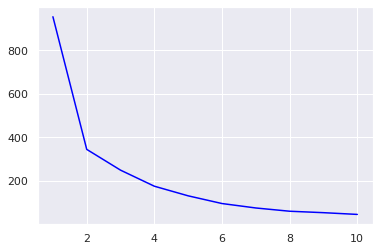

In [11]:
target=[]
Karray=np.arange(1,11)
for i in Karray:
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    target.append(kmeans.inertia_)
plt.plot(Karray,target,color='blue')

In [4]:
clusters= kmeans.predict(X_scaled) # Find the class of particular sample it belongs to

In [5]:
#Ground truth label encoding 
y = [];
Species = {'Bream':0,'Roach':1, 'Whitefish':2, 'Parkki':3 , 'Perch' : 4 , 'Pike':5 , 'Smelt':6 }
for Specie in ytrain2:
    y.append(Species[Specie])
y=np.asarray(y) 

In [6]:
# Swaping true label as per clusters 

from scipy.stats import mode
k_label = np.zeros_like(clusters)
for i in range(7):
    tempmask = (clusters == i) # return true and false with true where cluster is equal to i-th label
    
    k_label[tempmask] = mode(y[tempmask])[0] # It will return value which is the most occuring in 
                                            # the given array 

# It can be seen from the below two arrays that the above process is just swapping clusters class labels to get the maximum accuracy


In [7]:
print(clusters)

[0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 3 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 4 2 2 3 3 1 1 1 1 1 1 0 0 0 3 3
 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 4 4
 2 4 4 4 4 2 4 2 2 2 2 2 2 2 2 2 2 0 6 6 6 6 6 6 6 6 6 6 6 5 5 5 5 5 3 3 3
 3 3 3 3 3 3 3 3 3 3 3]


In [8]:
print(k_label)

[4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 6 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 6 6 4 4 4 4 4 4 4 4 4 6 6
 6 6 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0
 4 0 0 0 0 4 0 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6
 6 6 6 6 6 6 6 6 6 6 6]


# How well do the clusters that you obtained in K-means clustering compare to the true class labels (Species)?

In [9]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, k_label))

0.6226415094339622


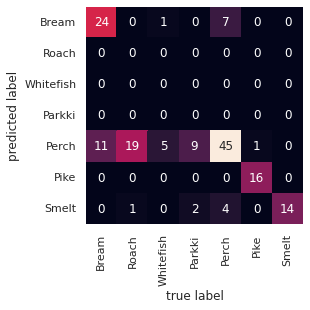

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
mat = confusion_matrix(y, k_label)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=Species,
            yticklabels=Species)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Describing Results

The dataset is highly imbalnced, there are only $6$ examples for the specie of "Whitefish". For the first class, Bream, there are $35$ samples in total out of which $25$ are classified as Bream and rest of them are classfied as Perch. 
The maximum error in classification is in case of Roach, Whitefish, and Parkki. Most of them are classified as perch. The possible reason of this failure is data distribution. More than one third of the dataset is consist of Perch, a possible reason of failure in classifying the other classes with small number of samples. The other reason of this miscalssifcation can be the close resembalnce of features in between Perch and rest of the three classes.

For Pike and Smelt even thoguh we don't have many sampels the results are promising indicating that features describing these two species are more discrete when compared to other fish species. 

